In [24]:
library(tidyverse)
library(ggplot2)
library(corrplot)

In [25]:
myData <- read.table(file="bats.csv", sep=";", skip=3, header=T)
names(myData)

[1] "Species" "Diet"    "Clade"   "BOW"     "BRW"     "AUD"     "MOB"    
[8] "HIP"

## Study of the relationship between brain weight and body mass

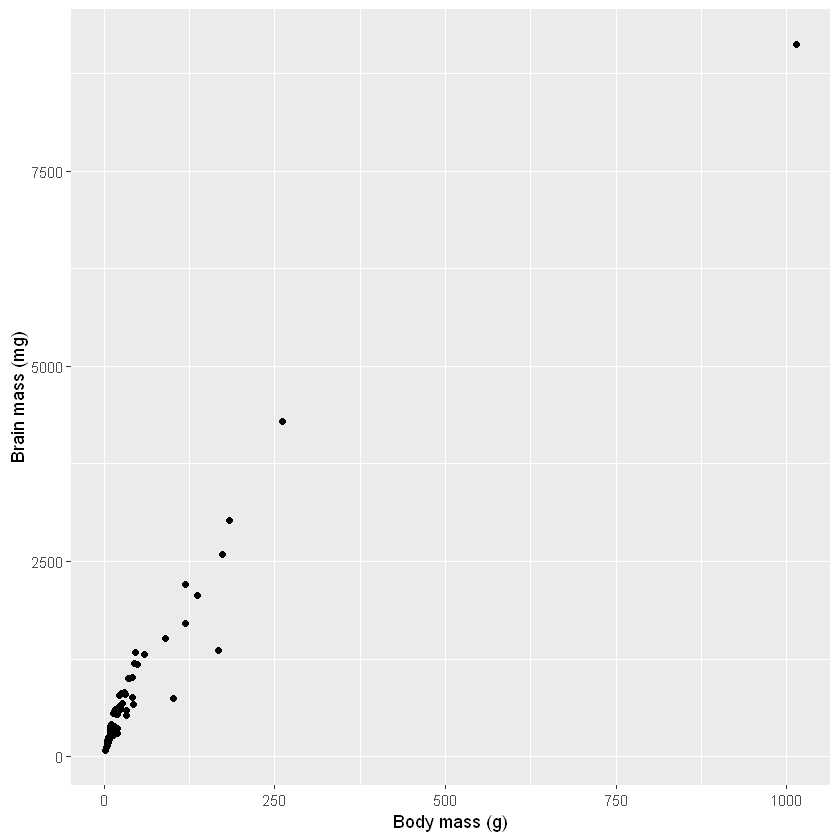

In [26]:

phyto = myData[(myData$Diet==1),]
ggplot(myData, aes(x=BOW, y=BRW)) + geom_point() +
xlab("Body mass (g)") + ylab("Brain mass (mg)") 

In [27]:
reg1 = lm(BRW ~ BOW, data=phyto)
summary(reg1)


Call:
lm(formula = BRW ~ BOW, data = phyto)

Residuals:
    Min      1Q  Median      3Q     Max 
-628.32 -233.94  -65.74  158.26 1308.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 623.4469    81.4762   7.652 3.14e-08 ***
BOW           8.9999     0.3972  22.659  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 396.9 on 27 degrees of freedom
Multiple R-squared:   0.95,	Adjusted R-squared:  0.9482 
F-statistic: 513.4 on 1 and 27 DF,  p-value: < 2.2e-16


From the table above we can read these information:

   0. The mathematical formula of the model is $BRM = 8.99*BOW + 623.44$
   1. The estimate of the intercept = $623.4469$
   2. Test statistic = $22.659$
   3. H0 is the null hypothesis making an hypothesis that the coefficient $\beta_1$ is equal to zero and it's rejected because its corresponding p-value is less than $0.5$
   4. As H0 is rejected, than we can concluse that there is a indeed a relationship between Brain Weight variable and Body Mass variable. 
   5. The coefficient of determination ($R^2$) is equal to $0.95$ which means that the variation is well explained by the model

#**Interpretation** 

When p Value is less than significance level (< 0.05), we can safely reject the null hypothesis that the co-efficient β of the predictor is zero. In our case, both these p-Values are well below the 0.05 threshold, so we can conclude our model is indeed statistically significant.

It is absolutely important for the model to be statistically significant before we can go ahead and use it to predict (or estimate) the dependent variable, otherwise, the confidence in predicted values from that model reduces and may be construed as an event of chance.

Also, for F-statistic, the larger it os, the more likely it is that the variation caused by the independent variable is real and not due to chance

In [28]:
anova(reg1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
BOW,1,80888380,80888379.9,513.4154,4.208907e-19
Residuals,27,4253838,157549.6,NA,NA


We get a little different information in the anova() function about the variation of data:

1. degrees of freedom, 
2. sum of squares( the total variation between the group means and the overall mean) 
3. mean squares (calculated by dividing the sum of squares by the degrees of freedom for each parameter).

small p-values comes from large F-statistics, and large F-statistics suggest that the between group variance is much larger than the within-group variance. So when the differences in group means is larger and yet the groups are not that variable, we tend to have significant factors in our ANOVA

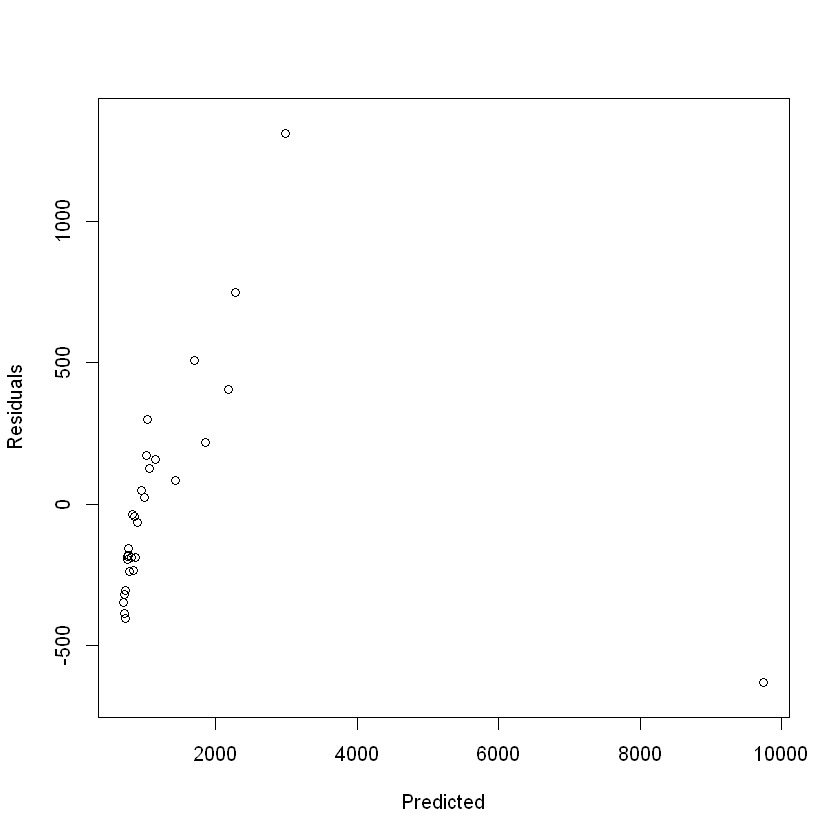

In [42]:
plot(reg1$fitted.values, reg1$residuals, xlab="Predicted", ylab="Residuals", asp = 4)

#**Note**: In this interpretation, we consider the absolute value of the residuals so as we can talk only about how far the predicted values are from the real ones.

From the graph above showing the residual values according to the predicted ones, we can notice that for the predicted brain mass values belonging to $[500mg -2000mg]$, the residual values ( representing the difference between the observed value of the variable to be explained (Brain Mass in our case) and its estimate ) are less significant comparing to the values greater than 2000mg whose corresponding residual values are important mainly for the last point whose predicted value is approaching 10000mg.   

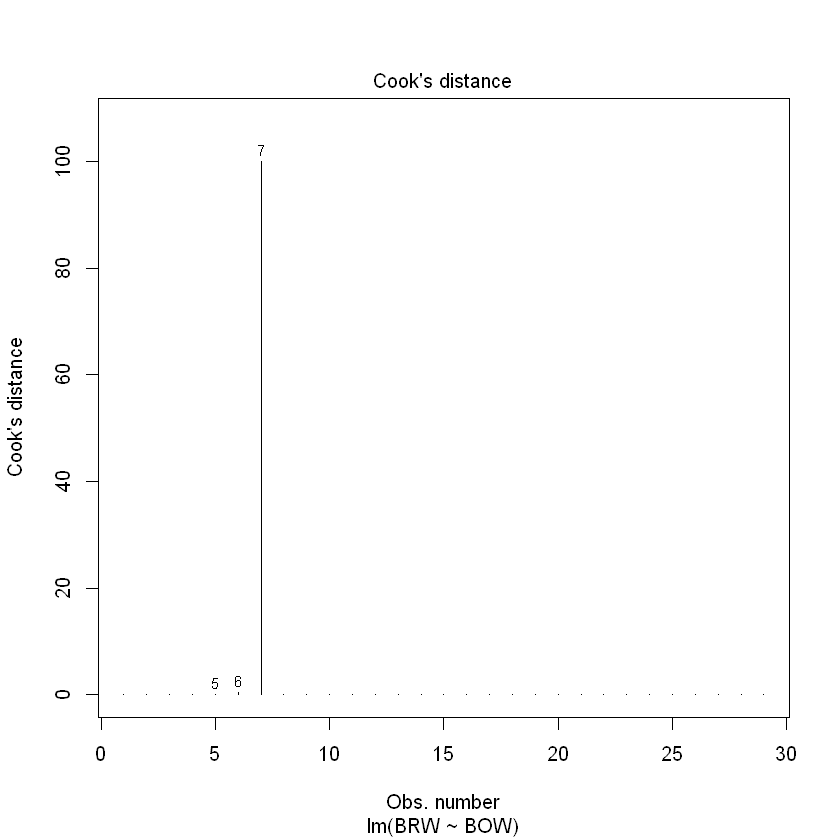

In [32]:
plot(reg1,4)

Cook's distance allows us to find influential *outliers* in a set of predictor variables. In other words, it’s a way to identify points that negatively affect your regression model.
In our case, it's the outlier is the variable 7 corresponding to phyto[7] whose caracteristics are described below. 

In [38]:
phyto[7,]

,Species,Diet,Clade,BOW,BRW,AUD,MOB,HIP
7,Pteropus vampyrus,1,I,1014,9121,16.93,243.54,331.29


In [39]:
phytobis=phyto[which(phyto$BRW<8000),]
reg2 = lm(BRW ~ BOW, data=phytobis)
summary(reg2)


Call:
lm(formula = BRW ~ BOW, data = phytobis)

Residuals:
    Min      1Q  Median      3Q     Max 
-269.76  -93.33    8.73  112.93  322.55 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 346.5452    35.4920   9.764 3.48e-10 ***
BOW          14.5099     0.4285  33.860  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 141.8 on 26 degrees of freedom
Multiple R-squared:  0.9778,	Adjusted R-squared:  0.977 
F-statistic:  1147 on 1 and 26 DF,  p-value: < 2.2e-16


After deleting the outlier from data, we've got:

   0. Another mathematical formula of the model: $BRM = 14.51*BOW + 346.54$
   1. A better coefficient of determination.
   2. A less p-value and a higher t-value
   3. The directing coefficient is lower which means that the line obtained from the linear regression has a less sloap, thus getting closer to each point in the graph
   

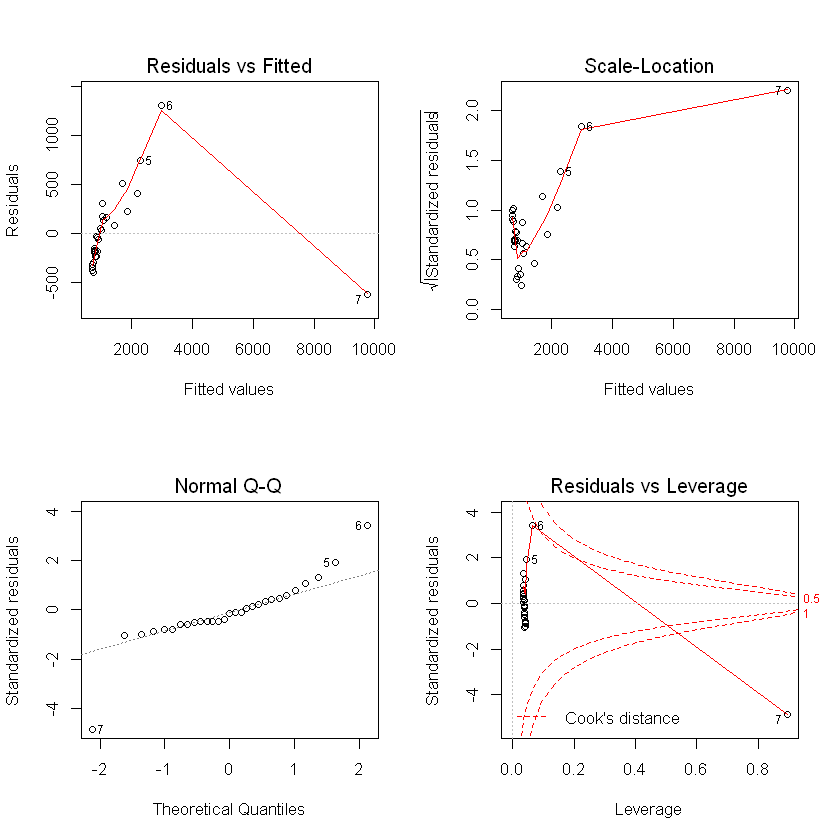

In [8]:
par(mfcol=c(2,2))
plot(reg1)

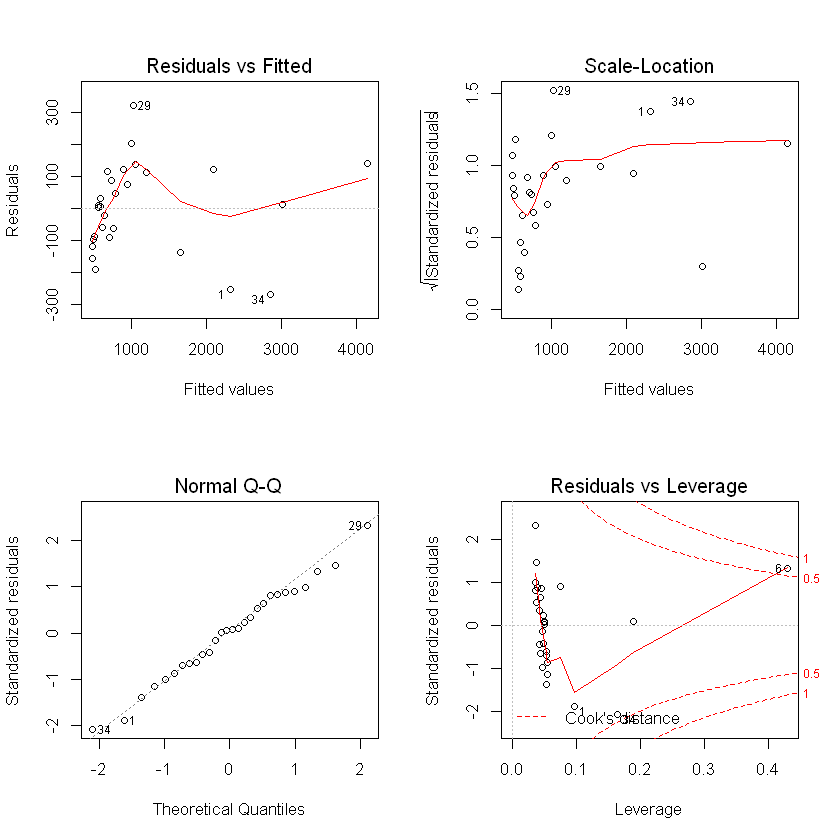

In [18]:
par(mfcol=c(2,2))
plot(reg2)

From Normal Q-Q plot, we can easily notice that the one obtained using Reg2 is much better than the one obtained using Reg1 as the line in its plot pass moslty through all points which means that it follows the normal distribution.
Then, we can conclude that the original data (before removing the 7th bat) are unbalanced beacause the study repots, in a large part, data about bats with slight brainweight.

## Study of the contribution to the total weight of each part of the brain

In this part, we try to understand the contribution of each part of the brain to the total weight. The variable to explain is the total weight of the brain (variable BRW). The potentially explanatory variables are the volume of the auditory part of the brain (variable AUD), the volume of the olfactory zone (MOB), and the volume of the hippocampus (HIP). Again, we work only with phytophagous species.

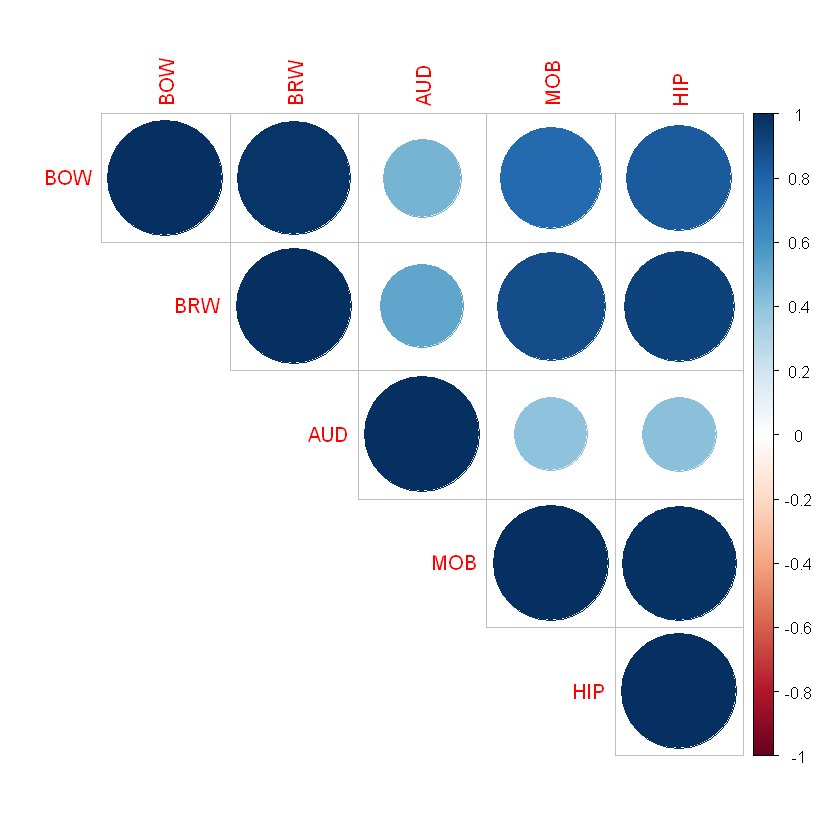

In [9]:
phytoNum=phyto[, c(4:8)]
mat.cor=cor(phytoNum)
corrplot(mat.cor, type="upper")

This graph showing the correlation of the variables two by two is very meaningful and easy to understand. 
As we want to explain the Brain Weight variable, we then focus on the second row and the second column of the graph showing that the variables BOW and HIP have a huge influence on BRW. Same for MOB but with less influence. Except for AUD which has almost no influence.


In [40]:
cor.test(phyto$BRW,phyto$HIP)
cor.test(phyto$BRW,phyto$MOB)
cor.test(phyto$BRW,phyto$AUD)


	Pearson's product-moment correlation

data:  phyto$BRW and phyto$HIP
t = 12.91, df = 27, p-value = 4.574e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8502663 0.9658107
sample estimates:
      cor 
0.9276811 



	Pearson's product-moment correlation

data:  phyto$BRW and phyto$MOB
t = 9.7964, df = 27, p-value = 2.203e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7644185 0.9442114
sample estimates:
      cor 
0.8834215 



	Pearson's product-moment correlation

data:  phyto$BRW and phyto$AUD
t = 3.2338, df = 27, p-value = 0.003215
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2007495 0.7497021
sample estimates:
      cor 
0.5283792 


These returned results approved totally what we said above based on the correlation graph. i.e. HIP and MOB have a significant influence on BRW because they have a correlation with BRW equal to 0.92 and 0.88 respectively. Unlike AUD variable having a correlation equal 0.52 which means that it has barely no influence to the BRW.

In other words, the brain weight increases/decreases when the volume of the olfactory zone (MOB) and the volume of the hippocampus (HIP) (both correlated based on the previous graph) increases/decreases. Same thing for Body Mass (based on the first part). However, the auditory part volume of the brain has no relationship with brain weight.

In [41]:
regm=lm(BRW~AUD+MOB+HIP,data=phytobis)
summary(regm)
anova(regm)


Call:
lm(formula = BRW ~ AUD + MOB + HIP, data = phytobis)

Residuals:
    Min      1Q  Median      3Q     Max 
-268.55  -68.84    9.88   61.66  375.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -312.692     76.628  -4.081  0.00043 ***
AUD           47.989      6.067   7.910 3.85e-08 ***
MOB           -2.444      3.257  -0.750  0.46034    
HIP           15.981      2.960   5.399 1.52e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 158.5 on 24 degrees of freedom
Multiple R-squared:  0.9744,	Adjusted R-squared:  0.9712 
F-statistic: 304.5 on 3 and 24 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
AUD,1,6817133.4,6817133.42,271.20969,1.397093e-14
MOB,1,15409397.1,15409397.05,613.04035,1.341315e-18
HIP,1,732652.6,732652.61,29.14751,1.519221e-05
Residuals,24,603264.6,25136.02,NA,NA


From these two tables above, we know that:
   1. The mathematical form of this second model (with 3 variables) is: $BRW = 47.98*AUD - 2.44*MOB + 15.98*HIP - 312.69$
   2. The model explains well the variation,as it has a high Coefficient confidence = $0.97$
   2. The p-values are very low <<0,05 for both AUD and HIP variables except for MOB meaning that the null hypothesis is not rejected this case.

In [12]:
reg0 = lm(BRW ~ 1, data = phyto)
step(reg0, scope=BRW~AUD + MOB + HIP, direction="forward")

Start:  AIC=433.88
BRW ~ 1

       Df Sum of Sq      RSS    AIC
+ HIP   1  73272731 11869487 378.74
+ MOB   1  66447848 18694370 391.92
+ AUD   1  23770396 61371823 426.39
<none>              85142218 433.88

Step:  AIC=378.74
BRW ~ HIP

       Df Sum of Sq      RSS    AIC
+ MOB   1   2846939  9022548 372.79
+ AUD   1   2013783  9855704 375.35
<none>              11869487 378.74

Step:  AIC=372.79
BRW ~ HIP + MOB

       Df Sum of Sq     RSS    AIC
+ AUD   1   1910121 7112426 367.89
<none>              9022548 372.79

Step:  AIC=367.89
BRW ~ HIP + MOB + AUD




Call:
lm(formula = BRW ~ HIP + MOB + AUD, data = phyto)

Coefficients:
(Intercept)          HIP          MOB          AUD  
   -1003.95        44.35       -29.24        52.82  


This method uses a forward stepwise logistic regression consisting on a forward construction which usually yields to models with less explanatory variables. 
The forward selection starts with no predictors in the model, iteratively adds the most contributive predictors, and stops when the improvement is no longer statistically significant.

To select the model which is best to fit for the data, Akaike Information Criterion is used. And the lower the best. And in this case, the less value of AIC is obtained for the mutlivariable model (AUD+HIP+MOB). 

## Link between volume of the auditory part and diet

The most important sense for an insectivorous bat is echo localisation, which is an auditory ability. On the contrary, a nectar-feeding bat must rather privilege capacities related to spatial memory, capacities governed by the hippocampus. We therefore propose now to study whether diet and sensory capacities are linked. To do so, we ask ourselves if the volume of the auditory lobe and the diet are related

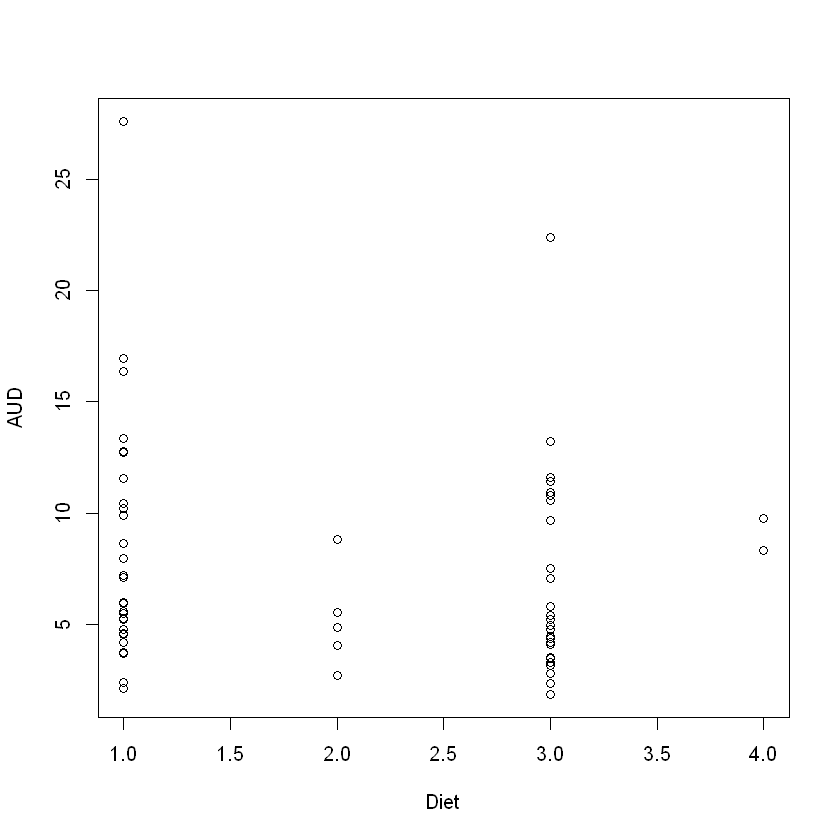

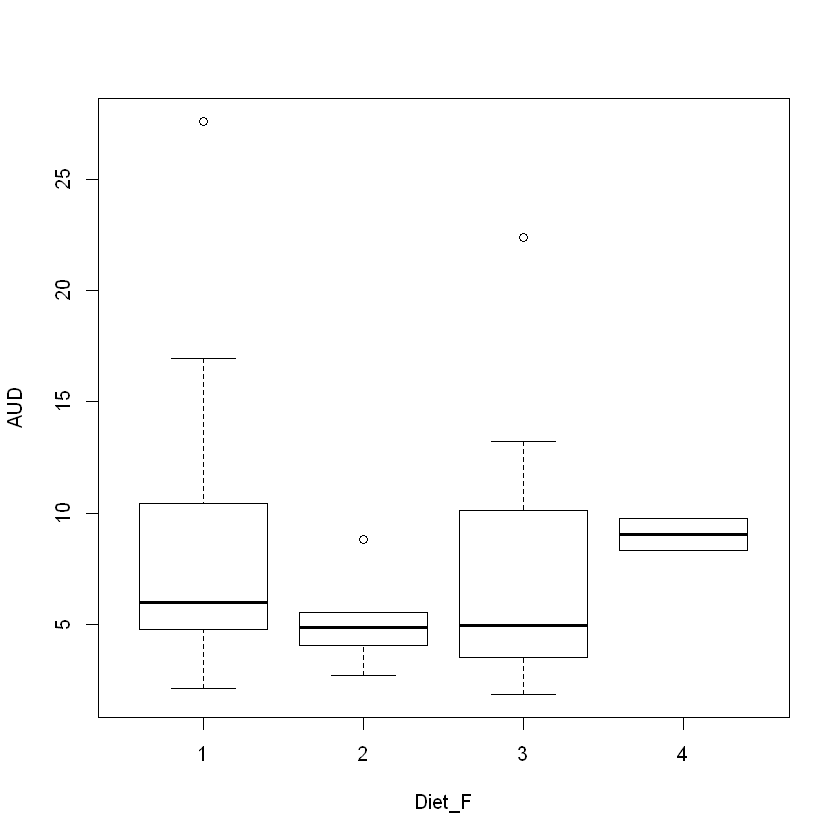

In [13]:
myData$Diet_F = as.factor(myData$Diet)
with(myData, plot(AUD~Diet))
with(myData, plot(AUD~Diet_F))

In my opinion, even the both graphs represent the same idea but still the first one is much better than the second, because we can clearly see how distributed data are for each auditory lobe variable as a function of diet factory.

In [14]:
lm = lm(AUD~Diet_F, data=myData)
anova(lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Diet_F,3,66.06941,22.02314,0.9292727,0.4323339
Residuals,59,1398.26034,23.69933,NA,NA


First obvious remark is p-value equal to 0.5 is much bigger than 0.05. This means that the null hypothesis H0 is not rejected and Diet factor variable may has (or not) an influence on the auditory lobe variable. 